In [1]:
import pandas as pd
import matplotlib as plt
import sklearn as skl
import tensorflow as tf
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

2023-02-21 17:59:56.536403: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
wine_df = pd.read_csv('winemag-data_first150k.csv',index_col= 'Unnamed: 0')

In [3]:
wine_df

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96.0,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96.0,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96.0,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96.0,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95.0,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
151839,Italy,"This opens with aromas of toast, oak, menthol,...",NaN,87.0,35.0,Piedmont,Barbaresco,NaN,Nebbiolo,Castello di Neive
151840,Argentina,"Flat in color, with a dull luster, this smells...",Grand Vin,87.0,30.0,Mendoza Province,Vista Flores,NaN,Bordeaux-style Red Blend,Antucura
151841,France,"Juicy dark plum, cherry and boysenberry are up...",Samsó Seulle,87.0,23.0,France Other,Vin de France,NaN,Cinsault,Frédéric Brouca
151842,US,"This light, refreshing rosé mixes fresh strawb...",Three Otters Pinot Noir,87.0,18.0,Oregon,Willamette Valley,Willamette Valley,Rosé,Fullerton


In [4]:
wine_df['region_2'] = wine_df['region_2'].fillna('None')

In [5]:
region_counts = wine_df.region_1.value_counts()
region_counts

Napa Valley                         6246
Columbia Valley (WA)                4994
Mendoza                             3597
Russian River Valley                3588
California                          3472
                                    ... 
Vin de Pays des Côtes de Thongue       1
Toledo                                 1
Vin de Pays de Montferrand             1
Napa County-Lake County                1
El Pomar District                      1
Name: region_1, Length: 1239, dtype: int64

<AxesSubplot: ylabel='Density'>

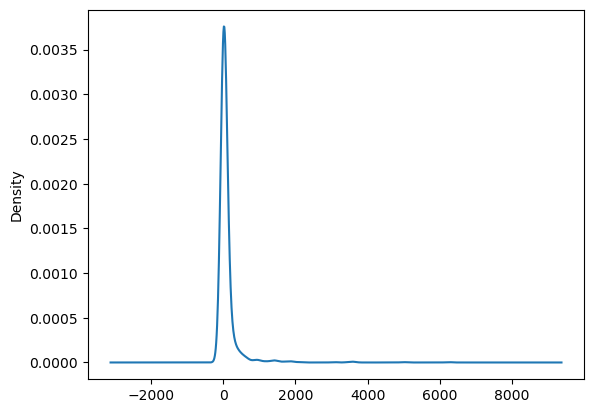

In [6]:
region_counts.plot.density()

In [7]:
region_counts.describe()

count    1239.000000
mean      102.202583
std       366.482829
min         1.000000
25%         4.000000
50%        12.000000
75%        58.000000
max      6246.000000
Name: region_1, dtype: float64

In [8]:
replace_region = list(region_counts[region_counts < 500].index)
replace_region

['Monterey County',
 'Barossa Valley',
 'South Eastern Australia',
 'Margaux',
 'Amador County',
 'Rías Baixas',
 'Mendocino',
 'Dundee Hills',
 'Mendocino County',
 'Colli Orientali del Friuli',
 'South Australia',
 'Oregon',
 'Oakville',
 'Sierra Foothills',
 'Franciacorta',
 'Haut-Médoc',
 'Conegliano Valdobbiadene Prosecco Superiore',
 'Virginia',
 'Livermore Valley',
 'Bordeaux Blanc',
 'Wahluke Slope',
 'Navarra',
 'Rueda',
 'Lake County',
 'Bolgheri',
 "Barbera d'Alba",
 'Pauillac',
 'Bordeaux',
 'Barossa',
 'North Coast',
 'Médoc',
 'Priorat',
 'Vino de la Tierra de Castilla',
 'Pomerol',
 "Vin de Pays d'Oc",
 'Uco Valley',
 'Valpolicella Superiore Ripasso',
 'Toro',
 'Bourgogne',
 'Arroyo Seco',
 'Sauternes',
 'Luján de Cuyo',
 'Rogue Valley',
 "Barbera d'Asti",
 'Howell Mountain',
 'Meursault',
 'Chehalem Mountains',
 'Rosso di Montalcino',
 'Clare Valley',
 'El Dorado',
 'Valpolicella Classico Superiore Ripasso',
 "Montepulciano d'Abruzzo",
 'Saint-Estèphe',
 'Saint-Julien',

In [9]:
for i in replace_region:
    wine_df.region_1 = wine_df.region_1.replace(i,"Other")

region_counts = wine_df.region_1.value_counts()



<AxesSubplot: ylabel='Density'>

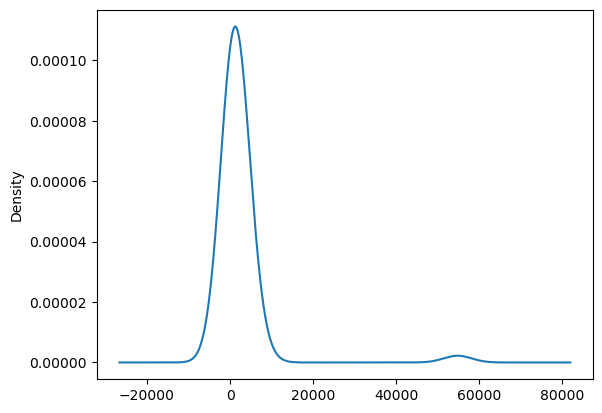

In [10]:
region_counts.plot.density()

In [11]:
winery_counts=wine_df.winery.value_counts()
winery_counts

Williams Selyem          374
Testarossa               277
DFJ Vinhos               258
Chateau Ste. Michelle    226
Columbia Crest           217
                        ... 
Château Magondeau          1
Château Haut-Lansac        1
Anko                       1
Alessandro Veglio          1
Fullerton                  1
Name: winery, Length: 14897, dtype: int64

<AxesSubplot: ylabel='Density'>

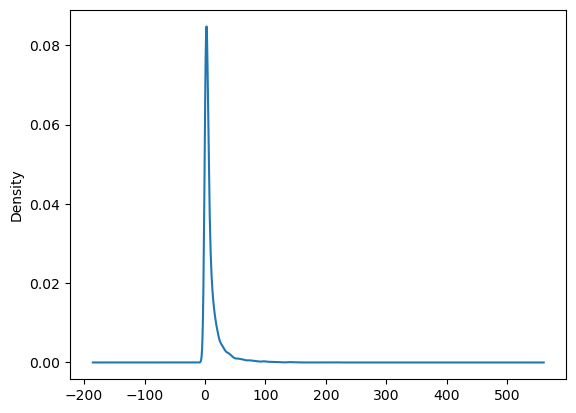

In [12]:
winery_counts.plot.density()

In [13]:
winery_counts.describe()

count    14897.000000
mean        10.192858
std         17.394968
min          1.000000
25%          2.000000
50%          4.000000
75%         11.000000
max        374.000000
Name: winery, dtype: float64

In [14]:
replace_winery = list(winery_counts[winery_counts < 30].index)
replace_winery

['Ruggeri & C.',
 'Kana',
 'Valdo',
 'Conceito Vinhos',
 'Huber',
 'Francis Coppola',
 'Burmester',
 'Castello di Amorosa',
 'Domaine Bruno Clair',
 "Quinta de Sant'Ana",
 'Belhurst',
 'Belle Glos',
 'Feudo Montoni',
 'BOND',
 'Fiuza',
 'Gritsch Mauritiushof',
 'Laird',
 'Portal Del Alto',
 'Rivetto',
 'Big Basin',
 'Seven of Hearts',
 'St. Clement',
 'Nobilo',
 'Fort Ross',
 'Château Malartic-Lagravière',
 'Casa do Valle',
 'Hawley',
 'Deutz',
 'San Rustico',
 'Lincourt',
 'West Cape Howe',
 'Dogwood',
 'Davis Bynum',
 'Gordon Brothers',
 'Warwick',
 'Cowhorn',
 'Boedecker Cellars',
 'Christian Lazo',
 'Corley',
 'Villa Mt. Eden',
 'Máté',
 'Alvaro Castro',
 'Peters Family',
 'Folie à Deux',
 'Shingleback',
 'Feudi di San Marzano',
 'Ruca Malen',
 'Escarpment',
 'William Cole',
 'Sella & Mosca',
 'Koyle',
 'Oak Knoll',
 'Rieflé',
 'Argiano',
 'Bota Box',
 'Allegrini',
 'Condado de Oriza',
 'Domaine Pouillon',
 'G. H. Mumm',
 'Stephen & Walker',
 'Poggio Nardone',
 'Drew',
 'J. Christo

In [15]:
for i in replace_winery:
    wine_df.winery = wine_df.winery.replace(i,"Other")

winery_counts = wine_df.winery.value_counts()

In [16]:
winery_counts

Other                    85150
Williams Selyem            374
Testarossa                 277
DFJ Vinhos                 258
Chateau Ste. Michelle      226
                         ...  
Carol Shelton               30
Merriam                     30
Knipser                     30
Borra                       30
Finca Allende               30
Name: winery, Length: 1185, dtype: int64

In [17]:
wine_df.dropna(inplace=True)

In [18]:
wine_df = wine_df.drop(columns=['description','designation'])

In [19]:
wine_df.tail()

,country,points,price,province,region_1,region_2,variety,winery
151835,US,87.0,30.0,Texas,Other,None,Nero d'Avola,Other
151836,US,87.0,18.0,Texas,Other,None,Roussanne,Other
151840,Argentina,87.0,30.0,Mendoza Province,Other,None,Bordeaux-style Red Blend,Other
151841,France,87.0,23.0,France Other,Other,None,Cinsault,Other
151842,US,87.0,18.0,Oregon,Willamette Valley,Willamette Valley,Rosé,Other


In [20]:
for col in wine_df:
    print(wine_df[col].dtype)

object
float64
float64
object
object
object
object
object


In [21]:
enc = OneHotEncoder(sparse= False)

In [22]:
for col in wine_df:
    if wine_df[col].dtype == 'object':
        enc_col = wine_df[col]
        wine_df = wine_df.drop(columns=col)
        enc_col2 = pd.DataFrame(enc.fit_transform(enc_col.values.reshape(-1,1)))
        enc_col2.columns = enc.get_feature_names([col])
        wine_df = wine_df.merge(enc_col2,left_index=True,right_index=True)
        
        

/Users/jordanravelo/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/jordanravelo/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/jordanravelo/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/jordanravelo/opt/anaconda3/envs/mlenv/l

In [23]:
wine_df.head()

,points,price,country_Argentina,country_Australia,country_Canada,country_France,country_Italy,country_Spain,country_US,province_Alsace,...,winery_William Hill Estate,winery_Williams Selyem,winery_Wilson,winery_Winderlea,winery_Woodward Canyon,winery_Wölffer,winery_Yalumba,winery_Zaca Mesa,winery_Zenato,winery_Zuccardi
0,96.0,235.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,96.0,110.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,96.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,96.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,95.0,66.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
for col in wine_df:
    print(col)

points
price
country_Argentina
country_Australia
country_Canada
country_France
country_Italy
country_Spain
country_US
province_Alsace
province_Andalucia
province_Arizona
province_Australia Other
province_Beaujolais
province_Bordeaux
province_British Columbia
province_Burgundy
province_California
province_Catalonia
province_Central Italy
province_Central Spain
province_Champagne
province_Colorado
province_France Other
province_Galicia
province_Idaho
province_Iowa
province_Italy Other
province_Languedoc-Roussillon
province_Levante
province_Loire Valley
province_Lombardy
province_Massachusetts
province_Mendoza Province
province_Michigan
province_Missouri
province_New Jersey
province_New Mexico
province_New South Wales
province_New York
province_North Carolina
province_Northeastern Italy
province_Northern Spain
province_Northwestern Italy
province_Ohio
province_Ontario
province_Oregon
province_Other
province_Pennsylvania
province_Piedmont
province_Provence
province_Rhône Valley
province_Si

In [25]:
y = wine_df['points']
X = wine_df.drop(columns='points')

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.fit_transform(X_test)

In [28]:
print(len(X_train_scaled[0]))

810


In [29]:
number_input_features = len(X_train_scaled[0])
hidden_layers_1 = 750
hidden_layers_list = [250]

nn = tf.keras.models.Sequential()

nn.add(tf.keras.layers.Dense(units=hidden_layers_1, input_dim=number_input_features, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
nn.add(tf.keras.layers.Dropout(0.5))
for i in hidden_layers_list:
    nn.add(tf.keras.layers.Dense(units=i, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
    nn.add(tf.keras.layers.Dropout(0.5))

nn.add(tf.keras.layers.Dense(units=1, activation='relu'))





2023-02-21 18:00:44.499170: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [30]:
checkpoint = ModelCheckpoint('best_weights.h5',save_best_only=True,save_weights_only = True,monitor = 'val_mae',verbose = 1)

In [31]:
nn.compile(loss = 'mae',optimizer ='adam',metrics=['mae'])

In [32]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 750)               608250    
                                                                 
 dropout (Dropout)           (None, 750)               0         
                                                                 
 dense_1 (Dense)             (None, 250)               187750    
                                                                 
 dropout_1 (Dropout)         (None, 250)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 251       
                                                                 
Total params: 796,251
Trainable params: 796,251
Non-trainable params: 0
_________________________________________________________________


In [33]:
early_stop = EarlyStopping(monitor='val_mae',patience = 5, verbose = 1)

In [34]:
start_time = time.time()
for i in range(1,101):
    if i == 75:
        early_stop = EarlyStopping(monitor='val_mae',patience = 3, verbose = 1)
    elif i == 80:
        early_stop = EarlyStopping(monitor='val_mae',patience = 1, verbose = 1)
    nn.fit(X_train_scaled,y_train,epochs=10000,validation_data=(X_test,y_test),callbacks=[checkpoint,early_stop])
    if i % 2 != 0:
        print(f"loaded Weights {i}")
        nn.load_weights('best_weights.h5')
    else:
        print(f"Random Weights {i}")

end_time = time.time()

Epoch 1/10000
49/51 [===========================>..] - ETA: 0s - loss: 216.0231 - mae: 65.5047
Epoch 1: val_mae improved from inf to 59.29276, saving model to best_weights.h5
51/51 [==============================] - 1s 7ms/step - loss: 213.1267 - mae: 64.5792 - val_loss: 136.3293 - val_mae: 59.2928
Epoch 2/10000
50/51 [============================>.] - ETA: 0s - loss: 73.7744 - mae: 14.3321
Epoch 2: val_mae improved from 59.29276 to 54.74047, saving model to best_weights.h5
51/51 [==============================] - 0s 5ms/step - loss: 73.7138 - mae: 14.3497 - val_loss: 103.4168 - val_mae: 54.7405
Epoch 3/10000
51/51 [==============================] - ETA: 0s - loss: 58.6168 - mae: 14.0753
Epoch 3: val_mae improved from 54.74047 to 37.90094, saving model to best_weights.h5
51/51 [==============================] - 0s 5ms/step - loss: 58.6168 - mae: 14.0753 - val_loss: 79.2267 - val_mae: 37.9009
Epoch 4/10000
50/51 [============================>.] - ETA: 0s - loss: 50.5312 - mae: 12.1794
E

Epoch 9/10000
51/51 [==============================] - ETA: 0s - loss: 21.9303 - mae: 8.2404
Epoch 9: val_mae did not improve from 5.67241
51/51 [==============================] - 0s 5ms/step - loss: 21.9303 - mae: 8.2404 - val_loss: 56.6783 - val_mae: 43.1660
Epoch 10/10000
39/51 [=====================>........] - ETA: 0s - loss: 21.1904 - mae: 8.0927
Epoch 10: val_mae did not improve from 5.67241
51/51 [==============================] - 0s 5ms/step - loss: 21.1654 - mae: 8.0428 - val_loss: 47.4815 - val_mae: 34.1482
Epoch 11/10000
39/51 [=====================>........] - ETA: 0s - loss: 21.2388 - mae: 8.1472
Epoch 11: val_mae did not improve from 5.67241
51/51 [==============================] - 0s 5ms/step - loss: 21.3023 - mae: 8.2335 - val_loss: 51.2861 - val_mae: 38.1890
Epoch 12/10000
39/51 [=====================>........] - ETA: 0s - loss: 20.8064 - mae: 8.1588
Epoch 12: val_mae did not improve from 5.67241
51/51 [==============================] - 0s 5ms/step - loss: 20.6242 - m

Epoch 4/10000
51/51 [==============================] - ETA: 0s - loss: 16.6068 - mae: 7.1863
Epoch 4: val_mae did not improve from 4.38351
51/51 [==============================] - 0s 5ms/step - loss: 16.6068 - mae: 7.1863 - val_loss: 28.3563 - val_mae: 18.9260
Epoch 5/10000
39/51 [=====================>........] - ETA: 0s - loss: 17.0551 - mae: 7.5778
Epoch 5: val_mae did not improve from 4.38351
51/51 [==============================] - 0s 5ms/step - loss: 17.1595 - mae: 7.6201 - val_loss: 19.8729 - val_mae: 10.2411
Epoch 6/10000
39/51 [=====================>........] - ETA: 0s - loss: 16.8698 - mae: 7.4341
Epoch 6: val_mae did not improve from 4.38351
51/51 [==============================] - 0s 5ms/step - loss: 16.8910 - mae: 7.5005 - val_loss: 17.7176 - val_mae: 8.6573
Epoch 7/10000
40/51 [======================>.......] - ETA: 0s - loss: 16.8953 - mae: 7.7951
Epoch 7: val_mae did not improve from 4.38351
51/51 [==============================] - 0s 5ms/step - loss: 16.8076 - mae: 7.7

Epoch 15/10000
39/51 [=====================>........] - ETA: 0s - loss: 14.0898 - mae: 7.2532
Epoch 15: val_mae did not improve from 2.49009
51/51 [==============================] - 0s 5ms/step - loss: 13.9720 - mae: 7.1523 - val_loss: 13.9063 - val_mae: 7.1021
Epoch 15: early stopping
loaded Weights 9
Epoch 1/10000
51/51 [==============================] - ETA: 0s - loss: 13.9381 - mae: 6.8620
Epoch 1: val_mae did not improve from 2.49009
51/51 [==============================] - 0s 5ms/step - loss: 13.9381 - mae: 6.8620 - val_loss: 17.1137 - val_mae: 10.0137
Epoch 2/10000
39/51 [=====================>........] - ETA: 0s - loss: 14.1886 - mae: 7.0838
Epoch 2: val_mae did not improve from 2.49009
51/51 [==============================] - 0s 5ms/step - loss: 14.1029 - mae: 6.9862 - val_loss: 25.2690 - val_mae: 18.0658
Epoch 3/10000
40/51 [======================>.......] - ETA: 0s - loss: 14.2142 - mae: 6.9251
Epoch 3: val_mae did not improve from 2.49009
51/51 [============================

Epoch 7/10000
50/51 [============================>.] - ETA: 0s - loss: 13.3501 - mae: 6.8173
Epoch 7: val_mae did not improve from 2.49009
51/51 [==============================] - 0s 5ms/step - loss: 13.3420 - mae: 6.8099 - val_loss: 13.6961 - val_mae: 7.2421
Epoch 8/10000
39/51 [=====================>........] - ETA: 0s - loss: 13.4344 - mae: 7.0789
Epoch 8: val_mae did not improve from 2.49009
51/51 [==============================] - 0s 5ms/step - loss: 13.4812 - mae: 7.0942 - val_loss: 26.9917 - val_mae: 20.3382
Epoch 8: early stopping
loaded Weights 13
Epoch 1/10000
39/51 [=====================>........] - ETA: 0s - loss: 14.1926 - mae: 6.7900
Epoch 1: val_mae did not improve from 2.49009
51/51 [==============================] - 0s 5ms/step - loss: 14.2283 - mae: 6.7530 - val_loss: 28.0497 - val_mae: 20.2617
Epoch 2/10000
39/51 [=====================>........] - ETA: 0s - loss: 14.9642 - mae: 7.1032
Epoch 2: val_mae did not improve from 2.49009
51/51 [==============================

Epoch 11/10000
39/51 [=====================>........] - ETA: 0s - loss: 12.6061 - mae: 6.7780
Epoch 11: val_mae did not improve from 2.49009
51/51 [==============================] - 0s 5ms/step - loss: 12.6155 - mae: 6.7878 - val_loss: 14.7741 - val_mae: 9.0311
Epoch 11: early stopping
loaded Weights 17
Epoch 1/10000
40/51 [======================>.......] - ETA: 0s - loss: 15.1229 - mae: 7.4964
Epoch 1: val_mae did not improve from 2.49009
51/51 [==============================] - 0s 5ms/step - loss: 15.1265 - mae: 7.3963 - val_loss: 20.3207 - val_mae: 12.1830
Epoch 2/10000
39/51 [=====================>........] - ETA: 0s - loss: 15.0972 - mae: 6.8657
Epoch 2: val_mae did not improve from 2.49009
51/51 [==============================] - 0s 5ms/step - loss: 15.1951 - mae: 6.9835 - val_loss: 11.8504 - val_mae: 3.7287
Epoch 3/10000
40/51 [======================>.......] - ETA: 0s - loss: 15.3310 - mae: 7.1149
Epoch 3: val_mae did not improve from 2.49009
51/51 [============================

Epoch 10/10000
39/51 [=====================>........] - ETA: 0s - loss: 12.8214 - mae: 6.6822
Epoch 10: val_mae did not improve from 2.03203
51/51 [==============================] - 0s 5ms/step - loss: 12.8340 - mae: 6.6908 - val_loss: 19.2526 - val_mae: 13.1748
Epoch 11/10000
40/51 [======================>.......] - ETA: 0s - loss: 12.6914 - mae: 6.7728
Epoch 11: val_mae did not improve from 2.03203
51/51 [==============================] - 0s 5ms/step - loss: 12.6726 - mae: 6.7741 - val_loss: 26.1650 - val_mae: 20.2763
Epoch 12/10000
39/51 [=====================>........] - ETA: 0s - loss: 12.7535 - mae: 6.8521
Epoch 12: val_mae did not improve from 2.03203
51/51 [==============================] - 0s 5ms/step - loss: 12.6837 - mae: 6.7714 - val_loss: 13.4367 - val_mae: 7.4451
Epoch 12: early stopping
loaded Weights 21
Epoch 1/10000
39/51 [=====================>........] - ETA: 0s - loss: 13.0588 - mae: 6.6167
Epoch 1: val_mae did not improve from 2.03203
51/51 [=======================

Epoch 3/10000
50/51 [============================>.] - ETA: 0s - loss: 12.1379 - mae: 6.8262
Epoch 3: val_mae did not improve from 2.03203
51/51 [==============================] - 0s 5ms/step - loss: 12.1197 - mae: 6.8081 - val_loss: 12.9269 - val_mae: 7.6439
Epoch 4/10000
39/51 [=====================>........] - ETA: 0s - loss: 12.4265 - mae: 7.0714
Epoch 4: val_mae did not improve from 2.03203
51/51 [==============================] - 0s 5ms/step - loss: 12.4893 - mae: 7.1197 - val_loss: 21.6731 - val_mae: 16.2038
Epoch 5/10000
39/51 [=====================>........] - ETA: 0s - loss: 11.9610 - mae: 6.6912
Epoch 5: val_mae did not improve from 2.03203
51/51 [==============================] - 0s 5ms/step - loss: 11.8896 - mae: 6.6996 - val_loss: 7.0445 - val_mae: 2.2282
Epoch 6/10000
39/51 [=====================>........] - ETA: 0s - loss: 11.3274 - mae: 6.6032
Epoch 6: val_mae did not improve from 2.03203
51/51 [==============================] - 0s 5ms/step - loss: 11.3228 - mae: 6.629

51/51 [==============================] - ETA: 0s - loss: 11.3165 - mae: 6.8429
Epoch 14: val_mae did not improve from 2.03203
51/51 [==============================] - 0s 5ms/step - loss: 11.3165 - mae: 6.8429 - val_loss: 13.5473 - val_mae: 9.0161
Epoch 15/10000
39/51 [=====================>........] - ETA: 0s - loss: 11.1666 - mae: 6.8015
Epoch 15: val_mae did not improve from 2.03203
51/51 [==============================] - 0s 5ms/step - loss: 11.1042 - mae: 6.7709 - val_loss: 9.8899 - val_mae: 5.6485
Epoch 16/10000
40/51 [======================>.......] - ETA: 0s - loss: 10.4668 - mae: 6.1682
Epoch 16: val_mae improved from 2.03203 to 1.69070, saving model to best_weights.h5
51/51 [==============================] - 0s 5ms/step - loss: 10.5061 - mae: 6.2195 - val_loss: 5.8563 - val_mae: 1.6907
Epoch 17/10000
39/51 [=====================>........] - ETA: 0s - loss: 10.3774 - mae: 6.3217
Epoch 17: val_mae did not improve from 1.69070
51/51 [==============================] - 0s 5ms/step 

Epoch 8/10000
50/51 [============================>.] - ETA: 0s - loss: 10.7623 - mae: 6.6116
Epoch 8: val_mae did not improve from 1.69070
51/51 [==============================] - 0s 5ms/step - loss: 10.7519 - mae: 6.6034 - val_loss: 6.7377 - val_mae: 2.8897
Epoch 9/10000
39/51 [=====================>........] - ETA: 0s - loss: 10.5409 - mae: 6.5448
Epoch 9: val_mae did not improve from 1.69070
51/51 [==============================] - 0s 5ms/step - loss: 10.5091 - mae: 6.5137 - val_loss: 6.9235 - val_mae: 3.0587
Epoch 10/10000
39/51 [=====================>........] - ETA: 0s - loss: 10.2932 - mae: 6.5590
Epoch 10: val_mae did not improve from 1.69070
51/51 [==============================] - 0s 5ms/step - loss: 10.2106 - mae: 6.5125 - val_loss: 10.0311 - val_mae: 6.4782
Epoch 11/10000
39/51 [=====================>........] - ETA: 0s - loss: 9.6753 - mae: 6.1870
Epoch 11: val_mae did not improve from 1.69070
51/51 [==============================] - 0s 5ms/step - loss: 9.5809 - mae: 6.103

Epoch 2/10000
50/51 [============================>.] - ETA: 0s - loss: 13.2069 - mae: 6.7291
Epoch 2: val_mae did not improve from 1.69070
51/51 [==============================] - 0s 5ms/step - loss: 13.2181 - mae: 6.7407 - val_loss: 11.7028 - val_mae: 5.3005
Epoch 3/10000
39/51 [=====================>........] - ETA: 0s - loss: 12.7520 - mae: 6.7737
Epoch 3: val_mae did not improve from 1.69070
51/51 [==============================] - 0s 5ms/step - loss: 12.6065 - mae: 6.7083 - val_loss: 11.9096 - val_mae: 6.3161
Epoch 4/10000
40/51 [======================>.......] - ETA: 0s - loss: 12.1907 - mae: 6.6389
Epoch 4: val_mae did not improve from 1.69070
51/51 [==============================] - 0s 5ms/step - loss: 12.1084 - mae: 6.6017 - val_loss: 11.8848 - val_mae: 6.6898
Epoch 5/10000
39/51 [=====================>........] - ETA: 0s - loss: 11.3300 - mae: 6.3664
Epoch 5: val_mae did not improve from 1.69070
51/51 [==============================] - 0s 5ms/step - loss: 11.2503 - mae: 6.362

49/51 [===========================>..] - ETA: 0s - loss: 9.6527 - mae: 6.4996
Epoch 16: val_mae did not improve from 1.69070
51/51 [==============================] - 0s 5ms/step - loss: 9.6695 - mae: 6.5229 - val_loss: 9.6438 - val_mae: 6.7195
Epoch 17/10000
49/51 [===========================>..] - ETA: 0s - loss: 9.6746 - mae: 6.6943
Epoch 17: val_mae did not improve from 1.69070
51/51 [==============================] - 0s 5ms/step - loss: 9.6742 - mae: 6.6935 - val_loss: 5.4553 - val_mae: 2.4152
Epoch 18/10000
39/51 [=====================>........] - ETA: 0s - loss: 9.6766 - mae: 6.5444
Epoch 18: val_mae did not improve from 1.69070
51/51 [==============================] - 0s 5ms/step - loss: 9.6614 - mae: 6.5878 - val_loss: 6.7256 - val_mae: 3.9189
Epoch 18: early stopping
Random Weights 36
Epoch 1/10000
39/51 [=====================>........] - ETA: 0s - loss: 9.0683 - mae: 6.4762
Epoch 1: val_mae did not improve from 1.69070
51/51 [==============================] - 0s 5ms/step - lo

51/51 [==============================] - ETA: 0s - loss: 9.7871 - mae: 6.2517
Epoch 7: val_mae did not improve from 1.69070
51/51 [==============================] - 0s 5ms/step - loss: 9.7871 - mae: 6.2517 - val_loss: 9.7853 - val_mae: 6.1924
Epoch 8/10000
39/51 [=====================>........] - ETA: 0s - loss: 9.9128 - mae: 6.4805 
Epoch 8: val_mae did not improve from 1.69070
51/51 [==============================] - 0s 5ms/step - loss: 9.7760 - mae: 6.3944 - val_loss: 9.9977 - val_mae: 6.8492
Epoch 9/10000
51/51 [==============================] - ETA: 0s - loss: 9.4008 - mae: 6.2806
Epoch 9: val_mae did not improve from 1.69070
51/51 [==============================] - 0s 5ms/step - loss: 9.4008 - mae: 6.2806 - val_loss: 4.6503 - val_mae: 1.7006
Epoch 10/10000
39/51 [=====================>........] - ETA: 0s - loss: 9.2852 - mae: 6.3075
Epoch 10: val_mae did not improve from 1.69070
51/51 [==============================] - 0s 5ms/step - loss: 9.3268 - mae: 6.3629 - val_loss: 4.6745 -

50/51 [============================>.] - ETA: 0s - loss: 8.4737 - mae: 6.1038
Epoch 14: val_mae did not improve from 1.63979
51/51 [==============================] - 0s 5ms/step - loss: 8.5048 - mae: 6.1347 - val_loss: 4.4731 - val_mae: 2.0971
Epoch 14: early stopping
loaded Weights 41
Epoch 1/10000
39/51 [=====================>........] - ETA: 0s - loss: 9.1288 - mae: 6.3059
Epoch 1: val_mae did not improve from 1.63979
51/51 [==============================] - 0s 5ms/step - loss: 9.0229 - mae: 6.2352 - val_loss: 4.3753 - val_mae: 1.8068
Epoch 2/10000
40/51 [======================>.......] - ETA: 0s - loss: 9.1503 - mae: 6.5842
Epoch 2: val_mae did not improve from 1.63979
51/51 [==============================] - 0s 5ms/step - loss: 9.1327 - mae: 6.5724 - val_loss: 4.5129 - val_mae: 1.9354
Epoch 3/10000
40/51 [======================>.......] - ETA: 0s - loss: 8.8478 - mae: 6.2150
Epoch 3: val_mae did not improve from 1.63979
51/51 [==============================] - 0s 5ms/step - loss: 

51/51 [==============================] - ETA: 0s - loss: 9.5918 - mae: 6.3219
Epoch 1: val_mae did not improve from 1.63979
51/51 [==============================] - 0s 5ms/step - loss: 9.5918 - mae: 6.3219 - val_loss: 5.5765 - val_mae: 2.0351
Epoch 2/10000
39/51 [=====================>........] - ETA: 0s - loss: 9.8049 - mae: 6.3381
Epoch 2: val_mae did not improve from 1.63979
51/51 [==============================] - 0s 5ms/step - loss: 9.6901 - mae: 6.2508 - val_loss: 6.6757 - val_mae: 3.2401
Epoch 3/10000
39/51 [=====================>........] - ETA: 0s - loss: 9.5883 - mae: 6.2861
Epoch 3: val_mae did not improve from 1.63979
51/51 [==============================] - 0s 5ms/step - loss: 9.6270 - mae: 6.3502 - val_loss: 5.2613 - val_mae: 2.0638
Epoch 4/10000
39/51 [=====================>........] - ETA: 0s - loss: 9.7606 - mae: 6.5108
Epoch 4: val_mae did not improve from 1.63979
51/51 [==============================] - 0s 5ms/step - loss: 9.7310 - mae: 6.4931 - val_loss: 5.8825 - va

51/51 [==============================] - 0s 5ms/step - loss: 8.1914 - mae: 6.2929 - val_loss: 3.6925 - val_mae: 1.8154
Epoch 14/10000
51/51 [==============================] - ETA: 0s - loss: 8.2344 - mae: 6.2904
Epoch 14: val_mae improved from 1.63503 to 1.61936, saving model to best_weights.h5
51/51 [==============================] - 0s 5ms/step - loss: 8.2344 - mae: 6.2904 - val_loss: 3.6797 - val_mae: 1.6194
Epoch 15/10000
39/51 [=====================>........] - ETA: 0s - loss: 8.3801 - mae: 6.2471
Epoch 15: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 8.4179 - mae: 6.2951 - val_loss: 3.6483 - val_mae: 1.6362
Epoch 16/10000
39/51 [=====================>........] - ETA: 0s - loss: 8.2188 - mae: 6.2745
Epoch 16: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 8.1990 - mae: 6.2569 - val_loss: 4.7657 - val_mae: 2.8443
Epoch 17/10000
39/51 [=====================>........] - ETA: 0s - l

Epoch 9/10000
50/51 [============================>.] - ETA: 0s - loss: 7.8217 - mae: 5.9497
Epoch 9: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 7.7997 - mae: 5.9279 - val_loss: 14.6555 - val_mae: 12.8237
Epoch 10/10000
39/51 [=====================>........] - ETA: 0s - loss: 7.9991 - mae: 6.2899
Epoch 10: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 8.0492 - mae: 6.3466 - val_loss: 5.6549 - val_mae: 4.0382
Epoch 11/10000
39/51 [=====================>........] - ETA: 0s - loss: 7.7664 - mae: 6.0459
Epoch 11: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 7.9316 - mae: 6.2069 - val_loss: 4.6788 - val_mae: 2.9541
Epoch 12/10000
40/51 [======================>.......] - ETA: 0s - loss: 7.7001 - mae: 5.9807
Epoch 12: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 7.6894 - mae: 6.0180 -

49/51 [===========================>..] - ETA: 0s - loss: 7.8540 - mae: 6.0893
Epoch 7: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 7.9063 - mae: 6.1380 - val_loss: 5.7939 - val_mae: 3.8869
Epoch 8/10000
51/51 [==============================] - ETA: 0s - loss: 8.2054 - mae: 6.2846
Epoch 8: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 8.2054 - mae: 6.2846 - val_loss: 3.4868 - val_mae: 1.7106
Epoch 9/10000
39/51 [=====================>........] - ETA: 0s - loss: 7.9371 - mae: 6.2574
Epoch 9: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 8.0482 - mae: 6.3731 - val_loss: 3.6923 - val_mae: 2.0132
Epoch 10/10000
51/51 [==============================] - ETA: 0s - loss: 7.9280 - mae: 6.3029
Epoch 10: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 7.9280 - mae: 6.3029 - val_loss: 3.8412 - 

49/51 [===========================>..] - ETA: 0s - loss: 8.7645 - mae: 6.3100
Epoch 5: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 8.7712 - mae: 6.3168 - val_loss: 4.7604 - val_mae: 2.2755
Epoch 6/10000
39/51 [=====================>........] - ETA: 0s - loss: 8.4902 - mae: 6.1719
Epoch 6: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 8.5521 - mae: 6.2450 - val_loss: 4.2120 - val_mae: 2.0258
Epoch 6: early stopping
Random Weights 58
Epoch 1/10000
39/51 [=====================>........] - ETA: 0s - loss: 8.3910 - mae: 6.3405
Epoch 1: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 8.3391 - mae: 6.3170 - val_loss: 3.6497 - val_mae: 1.7640
Epoch 2/10000
40/51 [======================>.......] - ETA: 0s - loss: 8.1399 - mae: 6.3481
Epoch 2: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 8.

50/51 [============================>.] - ETA: 0s - loss: 8.4118 - mae: 6.4660
Epoch 1: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 8.4119 - mae: 6.4666 - val_loss: 3.5609 - val_mae: 1.6924
Epoch 2/10000
51/51 [==============================] - ETA: 0s - loss: 8.0651 - mae: 6.1332
Epoch 2: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 8.0651 - mae: 6.1332 - val_loss: 4.5404 - val_mae: 2.6129
Epoch 3/10000
39/51 [=====================>........] - ETA: 0s - loss: 8.0610 - mae: 6.1997
Epoch 3: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 8.0586 - mae: 6.2257 - val_loss: 4.4903 - val_mae: 2.7287
Epoch 4/10000
50/51 [============================>.] - ETA: 0s - loss: 7.9565 - mae: 6.2158
Epoch 4: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 7.9374 - mae: 6.1981 - val_loss: 3.5005 - va

51/51 [==============================] - 0s 5ms/step - loss: 9.5664 - mae: 6.2234 - val_loss: 10.5658 - val_mae: 7.7132
Epoch 6/10000
49/51 [===========================>..] - ETA: 0s - loss: 8.8030 - mae: 6.2820
Epoch 6: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 8.8046 - mae: 6.2933 - val_loss: 3.7870 - val_mae: 1.6511
Epoch 7/10000
39/51 [=====================>........] - ETA: 0s - loss: 8.4314 - mae: 6.3874
Epoch 7: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 8.2096 - mae: 6.2211 - val_loss: 3.4815 - val_mae: 1.7033
Epoch 8/10000
39/51 [=====================>........] - ETA: 0s - loss: 8.0418 - mae: 6.1765
Epoch 8: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 7.9600 - mae: 6.0717 - val_loss: 3.6302 - val_mae: 1.6849
Epoch 9/10000
39/51 [=====================>........] - ETA: 0s - loss: 8.1920 - mae: 6.2772
Epoch 9: val_mae 

Epoch 7/10000
39/51 [=====================>........] - ETA: 0s - loss: 7.9636 - mae: 6.1277
Epoch 7: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 8.0790 - mae: 6.2528 - val_loss: 4.4571 - val_mae: 2.7009
Epoch 8/10000
39/51 [=====================>........] - ETA: 0s - loss: 8.0528 - mae: 6.3613
Epoch 8: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 8.1286 - mae: 6.4584 - val_loss: 3.8063 - val_mae: 2.2353
Epoch 9/10000
39/51 [=====================>........] - ETA: 0s - loss: 7.8102 - mae: 6.2560
Epoch 9: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 7.7956 - mae: 6.2354 - val_loss: 4.1052 - val_mae: 2.5212
Epoch 10/10000
39/51 [=====================>........] - ETA: 0s - loss: 7.5980 - mae: 6.0769
Epoch 10: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 7.6443 - mae: 6.1287 - val_l

50/51 [============================>.] - ETA: 0s - loss: 7.6630 - mae: 6.1744
Epoch 6: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 7.6530 - mae: 6.1631 - val_loss: 3.3854 - val_mae: 1.7389
Epoch 7/10000
51/51 [==============================] - ETA: 0s - loss: 7.7065 - mae: 6.2282
Epoch 7: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 7.7065 - mae: 6.2282 - val_loss: 3.1259 - val_mae: 1.7735
Epoch 8/10000
39/51 [=====================>........] - ETA: 0s - loss: 7.7878 - mae: 6.4076
Epoch 8: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 7.7106 - mae: 6.2953 - val_loss: 3.7941 - val_mae: 2.2890
Epoch 9/10000
51/51 [==============================] - ETA: 0s - loss: 7.5399 - mae: 6.1737
Epoch 9: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 7.5399 - mae: 6.1737 - val_loss: 2.9091 - va

51/51 [==============================] - 0s 5ms/step - loss: 9.2953 - mae: 6.0921 - val_loss: 4.9029 - val_mae: 2.0303
Epoch 4/10000
50/51 [============================>.] - ETA: 0s - loss: 8.9630 - mae: 6.1965
Epoch 4: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 8.9715 - mae: 6.2057 - val_loss: 5.4163 - val_mae: 2.7502
Epoch 5/10000
39/51 [=====================>........] - ETA: 0s - loss: 8.8296 - mae: 6.0315
Epoch 5: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 8.8467 - mae: 6.0810 - val_loss: 7.4519 - val_mae: 4.8826
Epoch 6/10000
51/51 [==============================] - ETA: 0s - loss: 8.8477 - mae: 6.5408
Epoch 6: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 8.8477 - mae: 6.5408 - val_loss: 4.3443 - val_mae: 2.3180
Epoch 7/10000
51/51 [==============================] - ETA: 0s - loss: 8.2954 - mae: 6.1704
Epoch 7: val_mae d

Epoch 2/10000
51/51 [==============================] - ETA: 0s - loss: 9.4722 - mae: 6.4484
Epoch 2: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 9.4722 - mae: 6.4484 - val_loss: 4.6247 - val_mae: 1.6648
Epoch 3/10000
39/51 [=====================>........] - ETA: 0s - loss: 9.2096 - mae: 6.2308
Epoch 3: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 9.2083 - mae: 6.3008 - val_loss: 5.9192 - val_mae: 3.3196
Epoch 4/10000
40/51 [======================>.......] - ETA: 0s - loss: 8.9775 - mae: 6.3061
Epoch 4: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 8.9408 - mae: 6.3027 - val_loss: 5.1682 - val_mae: 2.8096
Epoch 5/10000
39/51 [=====================>........] - ETA: 0s - loss: 8.5628 - mae: 6.3071
Epoch 5: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 8.4922 - mae: 6.2359 - val_los

51/51 [==============================] - 0s 6ms/step - loss: 8.9496 - mae: 6.2654 - val_loss: 5.3739 - val_mae: 3.0785
Epoch 2/10000
50/51 [============================>.] - ETA: 0s - loss: 8.5201 - mae: 6.3887
Epoch 2: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 8.5157 - mae: 6.3856 - val_loss: 3.8375 - val_mae: 1.8922
Epoch 3/10000
39/51 [=====================>........] - ETA: 0s - loss: 8.0779 - mae: 6.1227
Epoch 3: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 8.0692 - mae: 6.1226 - val_loss: 3.6413 - val_mae: 1.6403
Epoch 4/10000
51/51 [==============================] - ETA: 0s - loss: 8.1783 - mae: 6.1326
Epoch 4: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 8.1783 - mae: 6.1326 - val_loss: 4.0450 - val_mae: 2.1175
Epoch 4: early stopping
loaded Weights 87
Epoch 1/10000
40/51 [======================>.......] - ETA: 0s - los

51/51 [==============================] - 0s 5ms/step - loss: 8.5509 - mae: 6.2619 - val_loss: 3.8574 - val_mae: 1.6714
Epoch 3/10000
40/51 [======================>.......] - ETA: 0s - loss: 8.4757 - mae: 6.3546
Epoch 3: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 8.3618 - mae: 6.2674 - val_loss: 3.6191 - val_mae: 1.6698
Epoch 4/10000
50/51 [============================>.] - ETA: 0s - loss: 8.2881 - mae: 6.3832
Epoch 4: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 8.2858 - mae: 6.3805 - val_loss: 4.1267 - val_mae: 2.1720
Epoch 4: early stopping
loaded Weights 99
Epoch 1/10000
39/51 [=====================>........] - ETA: 0s - loss: 8.5942 - mae: 6.2355
Epoch 1: val_mae did not improve from 1.61936
51/51 [==============================] - 0s 5ms/step - loss: 8.8150 - mae: 6.2616 - val_loss: 5.0161 - val_mae: 1.6897
Epoch 2/10000
39/51 [=====================>........] - ETA: 0s - los

In [35]:
loss,accuracy = nn.evaluate(X_test,y_test)

13/13 [==============================] - 0s 2ms/step - loss: 4.6699 - mae: 2.0022


In [36]:
total_time = end_time - start_time

print(f'{total_time} seconds')

212.9652271270752 seconds


In [37]:
# number_input_features = len(X_train_scaled[0])
# hidden_layers_1 = 750
# hidden_layers_list = [250]

# nn_new = tf.keras.models.Sequential()

# nn_new.add(tf.keras.layers.Dense(units=hidden_layers_1, input_dim=number_input_features, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
# nn_new.add(tf.keras.layers.Dropout(0.5))
# for i in hidden_layers_list:
#     nn_new.add(tf.keras.layers.Dense(units=i, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
#     nn_new.add(tf.keras.layers.Dropout(0.5))

# nn_new.add(tf.keras.layers.Dense(units=1, activation='relu'))


In [38]:
# nn_new.summary()

In [39]:
# nn_new.load_weights('best_weights.h5')

In [40]:
# nn_new.compile(loss = 'mse',optimizer ='adam',metrics=['mae'])

In [41]:
# early_stop = EarlyStopping(monitor='val_mae',patience = 2, verbose = 1)

In [42]:
# nn_new.fit(X_train_scaled,y_train,epochs=10000,validation_data=(X_test,y_test),callbacks=[checkpoint,early_stop])

In [43]:
# nn_new.evaluate(X_test,y_test)